## End-to-end Breast cancer prediction using different types of properties


### This data set used from kaggle website https://kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


#### Steps

# step 1 - Problem definition
   > Using a previouse Features which computed from fine needle aspirate(FNA) of a breast mass(They describe characteriscs of the cell nuclei present in the image) then predict whether the patient have breast or not

# Step 2 - Data

#### This data set used from kaggle website https://kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


# Step 3 - Features
Attribute Information:

* 1) ID number
* 2) Diagnosis (M = malignant, B = benign)
    3-32)

    Ten real-valued features are computed for each cell nucleus:

* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

***The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.***

# Step 4 - Evaluation

> For this Problem we are using 95% accuracy


In [38]:
## Importing tools for data analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
# importing data-set
breast_cancer = pd.read_csv('datas/breast-cancer.csv')


### After importing our data know we are getting to know what data we have 
**We are predicting the final result Diagnosis(M = malignant, B = benign)**

In [11]:
breast_cancer.shape

(569, 33)

In [8]:
breast_cancer.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [9]:
breast_cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**All of our columns are numeric except diagnosis we come back to it later**

Now lets chacke if there is missing value

In [14]:
breast_cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [15]:
# I think the column (Unnamed: 32) is just an empty column so lets remove that
breast_cancer.drop('Unnamed: 32',axis=1,inplace=True)

<BarContainer object of 569 artists>

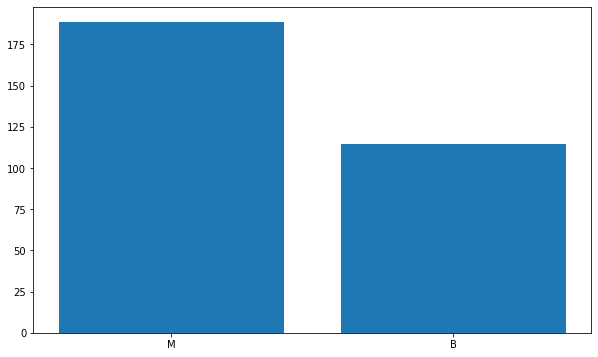

In [23]:
fit, ax = plt.subplots(figsize=(10,6))

ax.bar(breast_cancer['diagnosis'],breast_cancer.perimeter_mean)

In [32]:
breast_cancer["perimeter_mean"].value_counts()

82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64

In [34]:
# lets change the dtype of diagnosis column to numeric

breast_cancer['diagnosis'] = pd.Categorical(breast_cancer.diagnosis).codes

In [36]:
breast_cancer.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

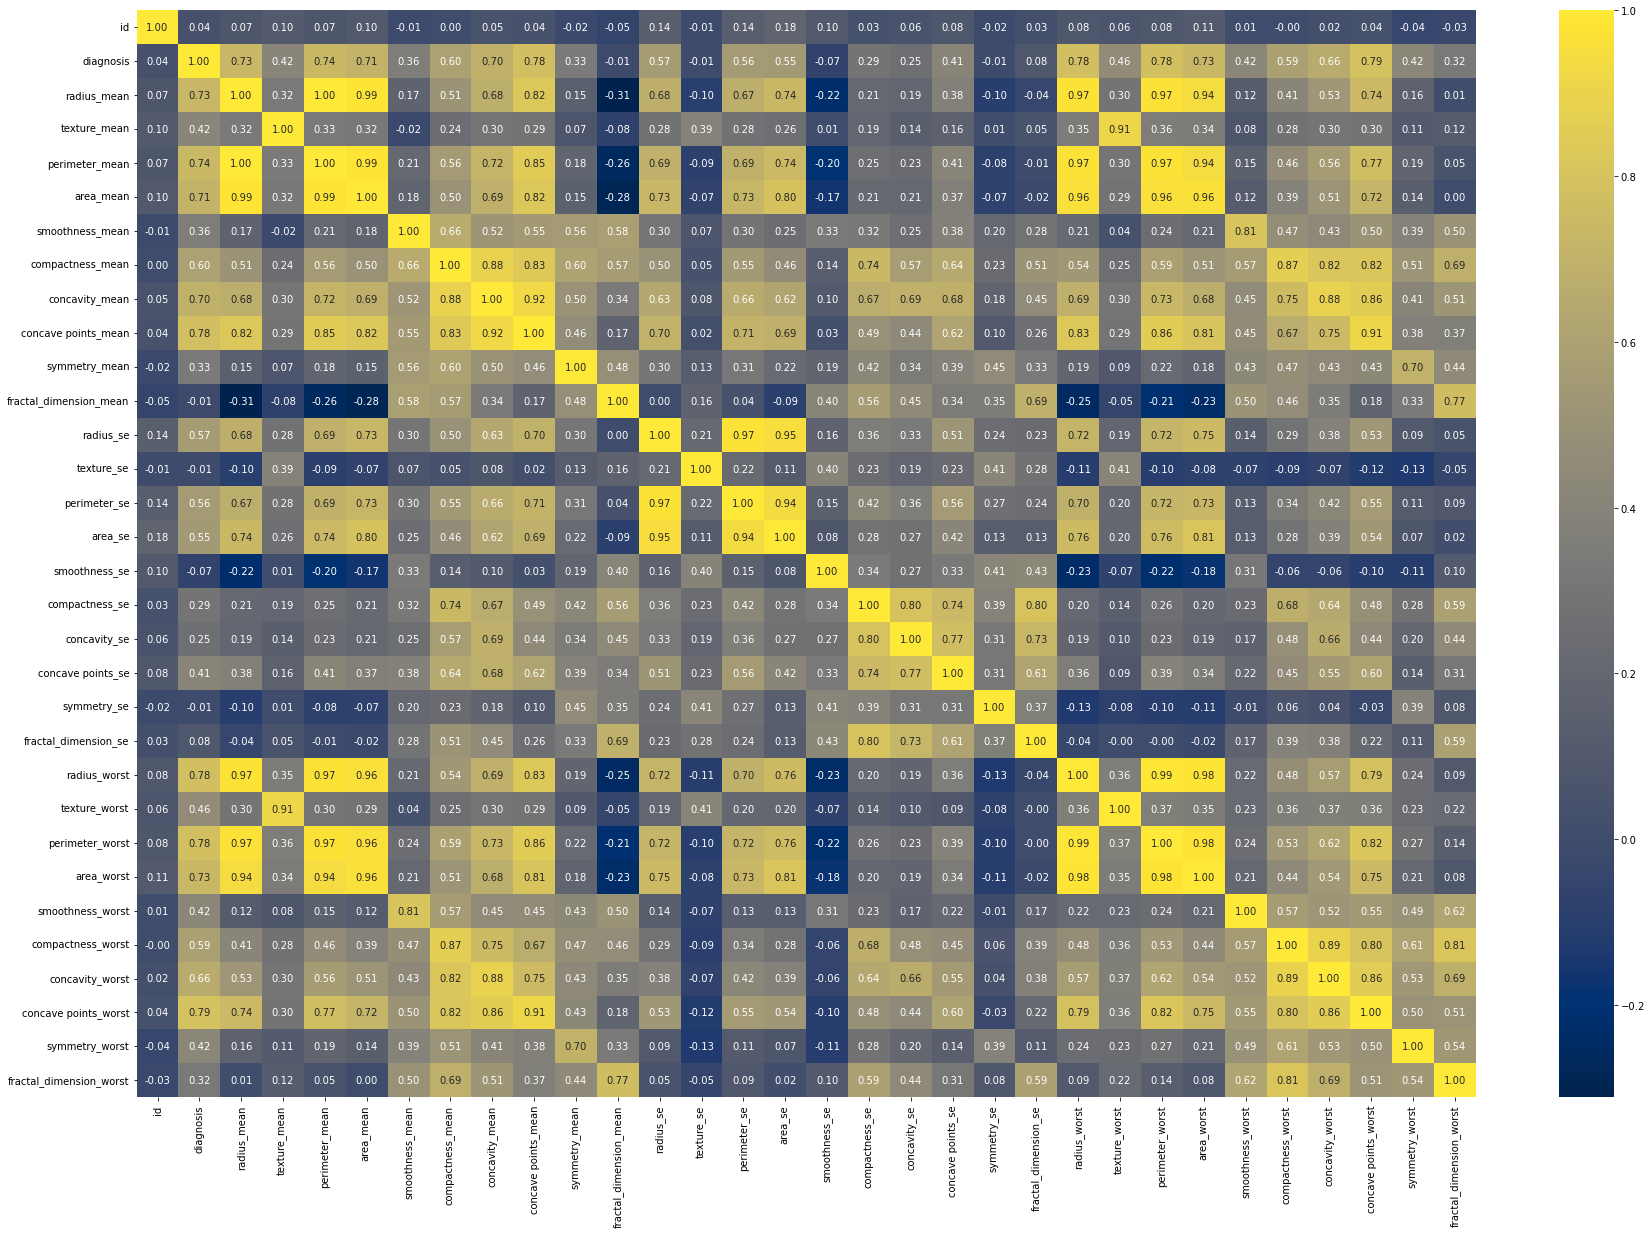

In [42]:
fig, ax = plt.subplots(figsize=(30,20))

ax = sns.heatmap(breast_cancer.corr(),cmap="cividis",annot=True,fmt='.2f')

## 5. Modeling
### We have explored and see how what data we have and how each data relate to each other. <br> Next we Build a machine learning model to predict if someone have heart disease or not

In [69]:
#importing tools 

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


#Evaluation metrics and othre tools
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import precision_score,roc_curve,confusion_matrix
from sklearn.metrics import recall_score,f1_score,accuracy_score,classification_report,plot_roc_curve

#### First split the data into training and test data set for both x and y

In [52]:
np.random.seed(42)
x = breast_cancer.drop('diagnosis',axis=1)
y = breast_cancer.diagnosis

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

models = {'randomForest': RandomForestClassifier(),'logistic':LogisticRegression()}

model_results = {}


In [53]:
# function to iterate over the models then fit and return the score

def fitAndScore(models):
    results = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        
        results[name] = model.score(x_test,y_test)
    
    for name,result in results.items():
        print(f"{name}: {result}")
    return results


In [54]:
baseline_model_results =  fitAndScore(models)

randomForest: 0.9649122807017544
logistic: 0.6228070175438597


### As we have seen on the above result our randomForestClassifier is doing great on data it never seen before

**First lest tune hyperparameter of the linear model and see if we improve using hyperparameter tuning**

In [55]:
lr_grid = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}

In [56]:

np.random.seed(42)

lr_model = LogisticRegression()
gs_lr = GridSearchCV(lr_model,lr_grid,cv=5,verbose=True,n_jobs=-1)

gs_lr.fit(x_train,y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\ABDU\Desktop\project\data-science\breast-cancer-prediction\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [57]:
gs_lr.best_params_

{'C': 78.47599703514607, 'penalty': 'l1', 'solver': 'liblinear'}

In [58]:
gs_lr.score(x_test,y_test)

0.9824561403508771

### Surprisingly we got 0.98 from 0.62 Thas Incredebl

### Now lets tune our `RandomForestClassifier` model

In [59]:
%%time
np.random.seed(42)

rf_model = RandomForestClassifier()

rf_grid = {
    'n_estimators':np.arange(10,200,20),
    'max_depth': [None,2,6,8],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2),
    'max_features': ['auto','sqrt']
}

rf_gr = GridSearchCV(rf_model,rf_grid,cv=5,verbose=True,n_jobs=-1)

rf_gr.fit(x_train,y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits
Wall time: 39min 12s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])},
             verbose=True)

In [60]:
rf_gr.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 130}

In [61]:
rf_gr.score(x_test,y_test)

0.9649122807017544

#### After tunning hyperparamter using GridSearchCV for both LogisticRegression and RandomForesClassicfication we get the best result on LogisticRegression

### Next lets evaluate with different metrics
 * ROC and AUC curve
 * Confusion matrix
 * Accuracy score
 * Classification report
 * Racall score
 * F1 score

In [65]:
#First lets predict with test datas

y_pred = gs_lr.predict(x_test)

C:\Users\ABDU\Desktop\project\data-science\breast-cancer-prediction\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


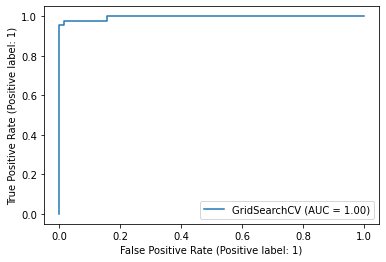

In [66]:

#ROC and auc curve
plot_roc_curve(gs_lr,x_test,y_test)

In [70]:

# Next we evaluate our model using confusion matrix
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_pred):
    """
    Showing confusion matrix with a better look
    """
    fig, ax = plt.subplots(figsize=(7,7))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=True,)
    plt.xlabel("Truth value")
    plt.ylabel('Predicted value')
    
    

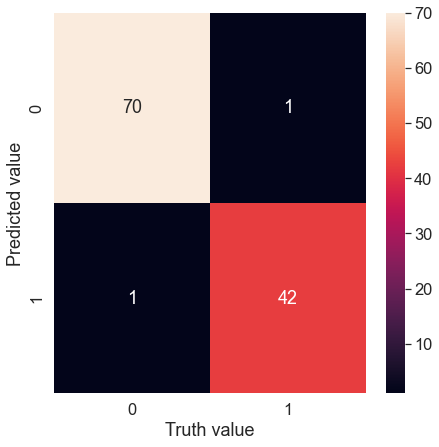

In [71]:
plot_confusion_matrix(y_test,y_pred)

In [72]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Calculating evaluation matrix using cross validation
#### Using cross validation we can calculate precision, accuracy,recall and f1 score.<br> To do it we going to use `cross_val_score()`

In [74]:
gs_lr.best_params_


{'C': 78.47599703514607, 'penalty': 'l1', 'solver': 'liblinear'}

In [82]:
np.random.seed(42)

logistic_model = LogisticRegression(penalty='l1',C=78.47599703514607,solver='liblinear')

cv_result = cross_val_score(logistic_model,x,y=y,cv=5,error_score='raise')

In [83]:
cv_result_mean = np.mean(cv_result)
cv_result_mean

0.968390001552554

In [85]:
logistic_model.fit(x_test,y_test)

y_pred = logistic_model.predict(x_test)

In [88]:
def metrics(model):
    
    """To a classfication report metrics like 
    Accuracy
    Precision
    recall
    f1
    """
    
    results = {
        'accuracy': accuracy_score(y_test,y_pred),
        'precesion': precision_score(y_test,y_pred),
        'f1': f1_score(y_test,y_pred),
        'recall': recall_score(y_test,y_pred),
        
    }
    
    return results

In [89]:
logistic_metrics_result = metrics(logistic_model)
logistic_metrics_result

{'accuracy': 0.9912280701754386,
 'precesion': 1.0,
 'f1': 0.988235294117647,
 'recall': 0.9767441860465116}

<AxesSubplot:>

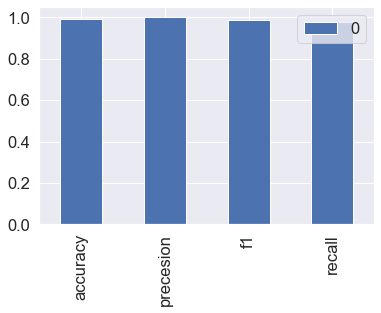

In [96]:
metric_df = pd.DataFrame(logistic_metrics_result,index=[0])

metric_df.T.plot(kind='bar')

In [90]:
logistic_model.coef_

array([[-2.28827401e-09, -2.83078386e-01, -7.54124536e-02,
        -3.75053941e-02,  1.95324417e-03, -1.52843546e+01,
         0.00000000e+00,  3.16739152e+00,  0.00000000e+00,
        -9.33258809e+00, -4.54862030e+01, -7.95950246e-01,
        -1.18386453e+00,  3.10489662e-01,  2.04306977e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.59128711e-02,  3.32485124e-02,  7.45897508e-03,
         7.97373901e-03,  0.00000000e+00,  4.29604827e+00,
         8.18066485e+00,  2.38091517e+01, -5.33204049e-01,
         0.00000000e+00]])

In [91]:
feature_dict = dict(zip(breast_cancer.columns,list(logistic_model.coef_[0])))
feature_dict

{'id': -2.2882740063190883e-09,
 'diagnosis': -0.2830783857524927,
 'radius_mean': -0.07541245359314512,
 'texture_mean': -0.037505394098732665,
 'perimeter_mean': 0.0019532441693138614,
 'area_mean': -15.284354557274115,
 'smoothness_mean': 0.0,
 'compactness_mean': 3.167391523197524,
 'concavity_mean': 0.0,
 'concave points_mean': -9.332588091963839,
 'symmetry_mean': -45.48620300711269,
 'fractal_dimension_mean': -0.7959502463989622,
 'radius_se': -1.1838645263941248,
 'texture_se': 0.31048966210019713,
 'perimeter_se': 0.2043069769324372,
 'area_se': 0.0,
 'smoothness_se': 0.0,
 'compactness_se': 0.0,
 'concavity_se': 0.0,
 'concave points_se': 0.0,
 'symmetry_se': 0.0,
 'fractal_dimension_se': -0.025912871108506468,
 'radius_worst': 0.03324851243277345,
 'texture_worst': 0.0074589750800911556,
 'perimeter_worst': 0.007973739012939464,
 'area_worst': 0.0,
 'smoothness_worst': 4.296048267669502,
 'compactness_worst': 8.180664852169548,
 'concavity_worst': 23.8091517166606,
 'concave

<AxesSubplot:>

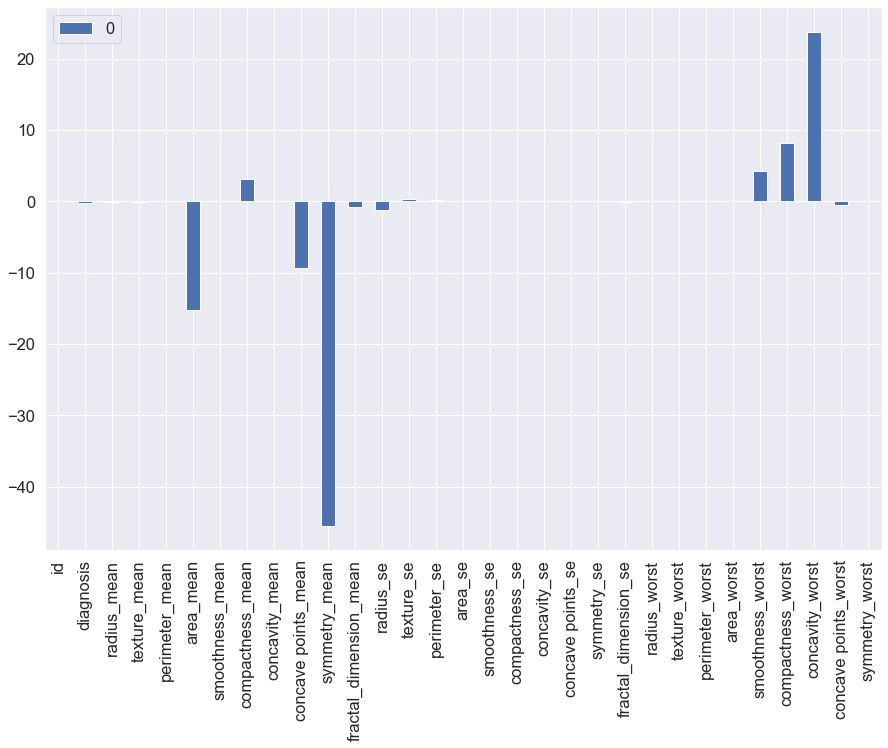

In [95]:
featute_df = pd.DataFrame(feature_dict,index=[0])

featute_df.T.plot(kind='bar',figsize=(15,10))

## After successful process we implement 0.99 accuracy 